## Overview

Pandas allows you to read structured datasets and visualize them using the `plot()` method. By default, Pandas uses `matplotlib` to create the plots.

In this notebook, we will take work with open dataset of crime in London.

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

We have 12 different CSV files containing crime data for each month of 2020. We download each of them to the data folder.

In [ ]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/police.uk/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)


It will be helpful to merge all 12 CSV files into a single dataframe. We can use `pd.concat()` to merge a list of dataframes.

In [ ]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

The resulting dataframe consists of over 1 million records of various crimes recorded in London in the year 2020.

In [ ]:
merged_df

## Create a Pie-Chart

Let's create a pie-chart showing the distribution of different types of crime. Pandas `groupby()` function allows us to calculate group statistics.

In [ ]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

We now uses the `plot()` method to create the chart. This method is a wrapper around `matplotlib` and can accept supported arguments from it.

Reference: [`pandas.DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
type_counts.plot(kind='pie', ax=ax)
plt.show()

Let's customize the chart. First we use `set_title()` method to add a title to the chart and `set_ylabel()` to remove the empty y-axis label. Lastly, we use the `plt.tight_layout()` to remove the extra whitespace around the plot.

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax)

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Matplotlib plots offer unlimited possibilities to customize your charts. Let's see some of the options available to customize the pie-chart.

* `wedgeprops`: Customize the look of each 'wedge' of the pie.
* `textprops`: Set the text properties of labels.

Reference: [`matplotlib.pyplot.pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

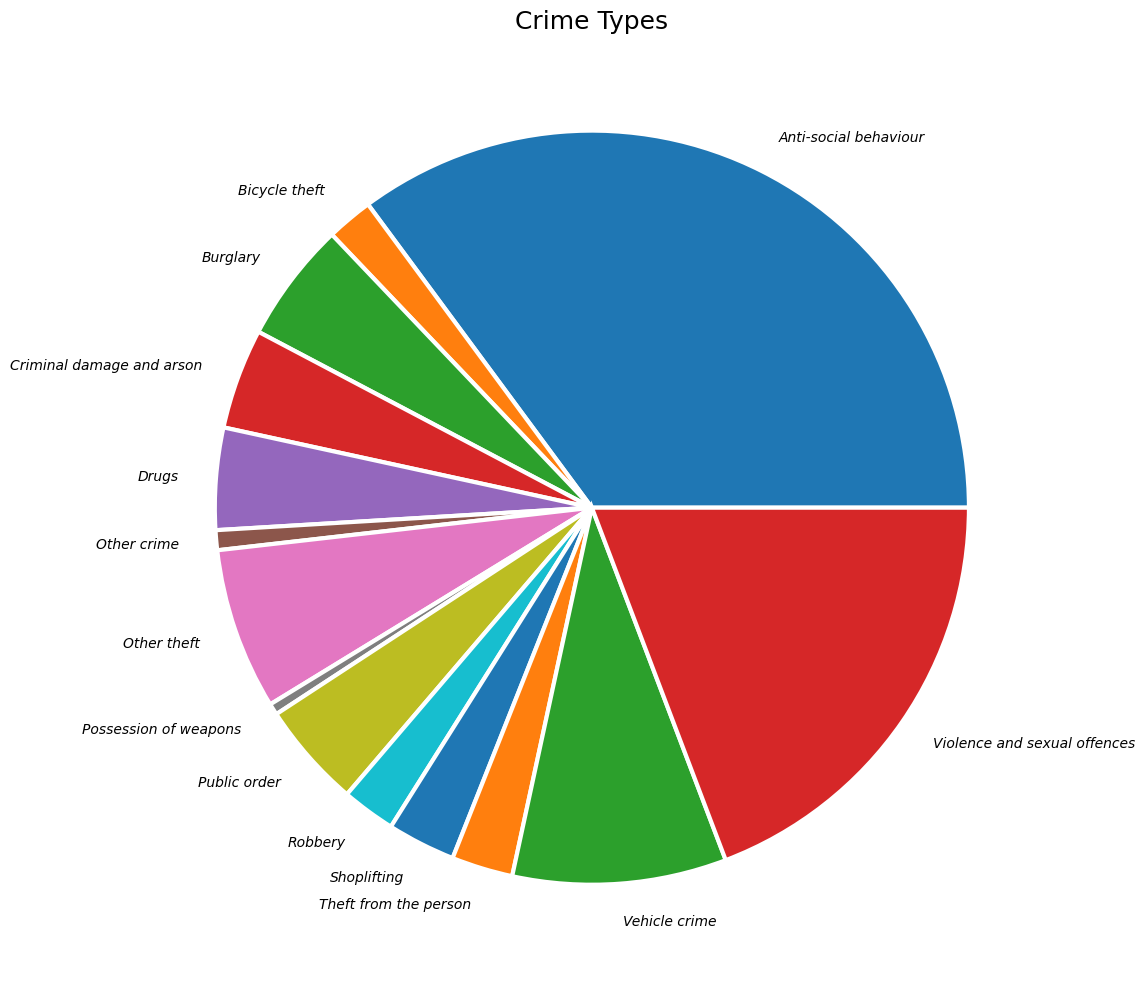

In [ ]:
wedgeprops={'linewidth': 3, 'edgecolor': 'white'}
textprops= {'fontsize': 10, 'fontstyle': 'italic'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax,
                 wedgeprops=wedgeprops,
                 textprops=textprops
                 )

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()


## Create a Bar Chart

We can also chart the trend of crime over the year. For this, let's group the data by month.

In [ ]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='bar', ax=ax)
plt.show()

As we learnt earlier, we can add multiple plots on the same Axes. We can add a `line` chart along with the `bar` chart to show the trendline as well. Lastly we add the titles and axis labels to finish the chart.

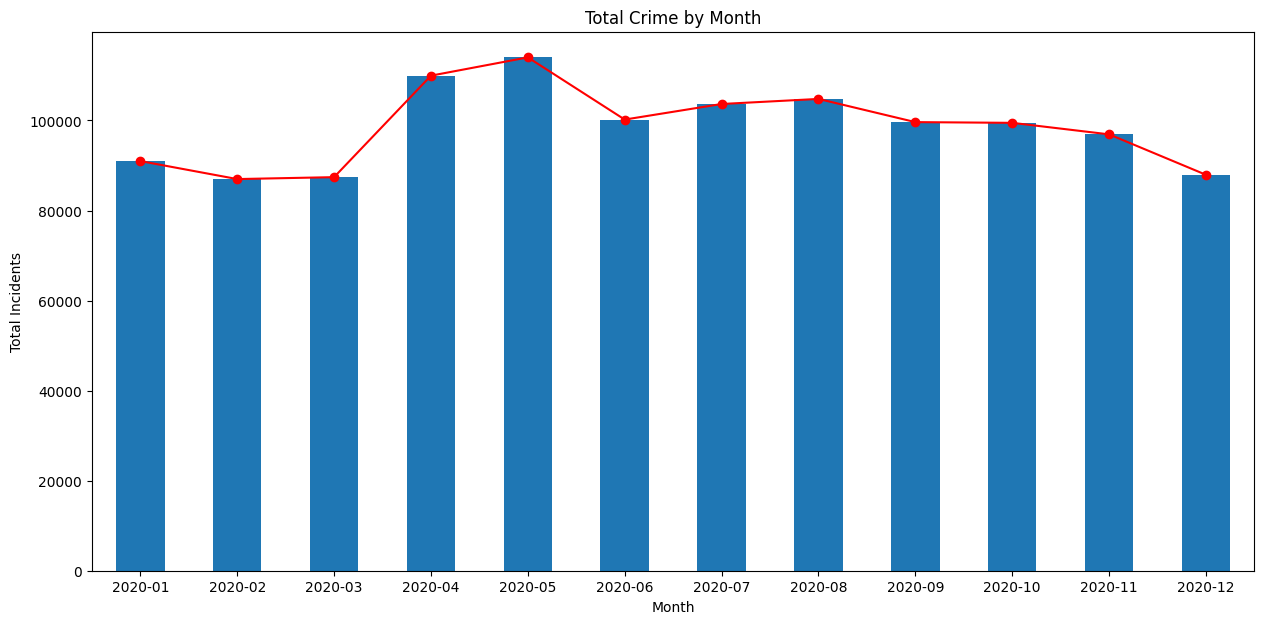

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

## Exercise

Plot the trend of Bicycle thefts as a line chart.

<img src='https://courses.spatialthoughts.com/images/python_dataviz/bicycle_thefts.png' width=800/>

 The cell below filters the `merged_df` dataframe to select incidents of 'Bicycle theft'. Group the results by months and plot the results.

In [ ]:
bicycle_thefts = merged_df[merged_df['Crime type'] == 'Bicycle theft']